## Model Selection

This notebook should include preliminary and baseline modeling.
- Try as many different models as possible.
- Don't worry about hyperparameter tuning or cross validation here.
- Ideas include:
    - linear regression
    - support vector machines
    - random forest
    - xgboost

In [12]:
# import models and fit 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
print(df.columns)

Index(['Unnamed: 0', 'property_id', 'year_built', 'sold_price', 'lot_sqft',
       'sqft', 'baths', 'garage', 'stories', 'beds',
       ...
       'tags_wooded_land', 'tags_nan', 'city_lat', 'city_lon', 'type_condo',
       'type_land', 'type_mobile', 'type_multi_family', 'type_single_family',
       'type_townhomes'],
      dtype='object', length=146)


In [14]:
# Load preprocessed data 
df = pd.read_csv('/Users/rimbarbar/LHL_DS-Midterm-Project/DS-Midterm-Project/data/processed/data_complete.csv')  

# Define features and target
X = df.drop(columns=['sold_price'])  
y = df['sold_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Machine": SVR(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

In [17]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Convert categorical columns using one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [18]:
# Check data types
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index([], dtype='object')


In [19]:
# check for missing values
print(df.isnull().sum().sum())  

0


In [20]:
# Ensure all columns are numeric
print(df.dtypes)  

Unnamed: 0            int64
property_id           int64
year_built            int64
sold_price            int64
lot_sqft              int64
                      ...  
type_land              bool
type_mobile            bool
type_multi_family      bool
type_single_family     bool
type_townhomes         bool
Length: 146, dtype: object


In [21]:
# checking for strings
for col in df.columns:
    unique_types = df[col].apply(type).unique()
    if any(t == str for t in unique_types):
        print(f"Column '{col}' contains string values!")


In [22]:
print(X_train.dtypes)
print(y_train.dtypes)
print(X_train.head())
print(y_train.head())
print(X_train.isnull().sum().sum(), y_train.isnull().sum().sum())

Unnamed: 0            int64
property_id           int64
year_built            int64
lot_sqft              int64
sqft                  int64
                     ...   
tags_waterfront       int64
tags_wooded_land      int64
tags_nan              int64
city_lat            float64
city_lon            float64
Length: 140, dtype: object
int64
      Unnamed: 0  property_id  year_built  lot_sqft  sqft  baths  garage  \
998          998   3547044935        1920      3049  2326      2       0   
254          254   4783251140        1922      7841  1728      2       2   
1074        1074   8726859512        2017      8398  2008      2       3   
643          643   6798227646        1965      9000  1612      2       0   
1452        1452   3250787813        1964     12632  2218      2       0   

      stories  beds           type  ...  tags_vaulted_ceiling  tags_view  \
998         1     6   multi_family  ...                     0          0   
254         1     5   multi_family  ...           

# Type column in X-train not needed for modeling; contains values like single-family which is throwing errors when training model

In [23]:
# dropping type column
X_train = X_train.drop(columns=["type"])
X_test = X_test.drop(columns=["type"])


In [24]:
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, rmse, mae, r2])
    print(f"{name}:\n RMSE: {rmse:.2f}, MAE: {mae:.2f}, R^2: {r2:.4f}\n")

Linear Regression:
 RMSE: 328690.32, MAE: 228932.48, R^2: -0.0694

Support Vector Machine:
 RMSE: 327317.32, MAE: 193034.85, R^2: -0.0605

Random Forest:
 RMSE: 223739.53, MAE: 119453.70, R^2: 0.5045

XGBoost:
 RMSE: 932997.51, MAE: 180347.77, R^2: -7.6163



In [25]:
# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R^2"])

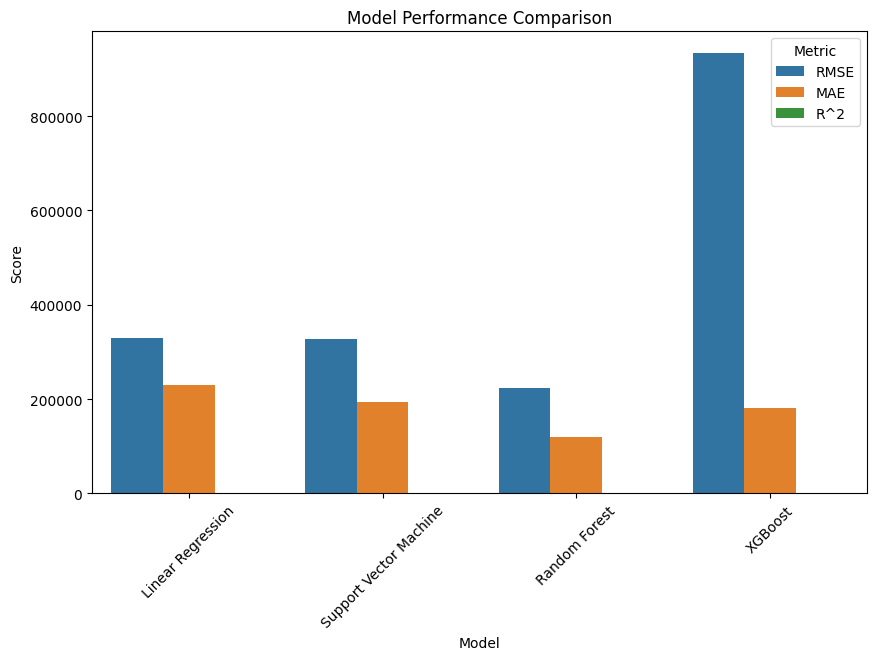

In [26]:
# Plot results
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars=["Model"], var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Metric")
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.show()

In [27]:
# Save results
df_results = results_df.sort_values(by='RMSE')
df_results.to_csv("model_comparison_results.csv", index=False)

Consider what metrics you want to use to evaluate success.
- If you think about mean squared error, can we actually relate to the amount of error?
- Try root mean squared error so that error is closer to the original units (dollars)
- What does RMSE do to outliers?
- Is mean absolute error a good metric for this problem?
- What about R^2? Adjusted R^2?
- Briefly describe your reasons for picking the metrics you use

- **Best Model: Random Forest** 
  - Lowest RMSE (223,739.53) and MAE (119,453.70)  
  - Highest R² (0.5045), explaining ~50% of variance  

- **Metric Selection:**  
  - **RMSE**: Measures error in dollars, penalizes large deviations  
  - **MAE**: Gives average error, less sensitive to outliers  
  - **R²**: Evaluates explanatory power (negative values indicate poor fit)  

- **Key Insights:**  
  - XGBoost performed the worst (RMSE: 932,997.51, R²: -7.6163)  
  - Random Forest is the most reliable model based on all metrics  
  - Further tuning could improve performance

## Feature Selection - STRETCH

> **This step doesn't need to be part of your Minimum Viable Product (MVP), but its recommended you complete it if you have time!**

Even with all the preprocessing we did in Notebook 1, you probably still have a lot of features. Are they all important for prediction?

Investigate some feature selection algorithms (Lasso, RFE, Forward/Backward Selection)
- Perform feature selection to get a reduced subset of your original features
- Refit your models with this reduced dimensionality - how does performance change on your chosen metrics?
- Based on this, should you include feature selection in your final pipeline? Explain

Remember, feature selection often doesn't directly improve performance, but if performance remains the same, a simpler model is often preferrable. 



In [ ]:
# perform feature selection 
# refit models
# gather evaluation metrics and compare to the previous step (full feature set)